In [1]:
!pip install ultralytics albumentations opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
# Скачивание изображений и аннотаций (~1Гб)
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

# Распаковка
!unzip val2017.zip -d coco
!unzip annotations_trainval2017.zip -d coco


Streaming output truncated to the last 5000 lines.
 extracting: coco/val2017/000000365745.jpg  
 extracting: coco/val2017/000000320425.jpg  
 extracting: coco/val2017/000000481404.jpg  
 extracting: coco/val2017/000000314294.jpg  
 extracting: coco/val2017/000000335328.jpg  
 extracting: coco/val2017/000000513688.jpg  
 extracting: coco/val2017/000000158548.jpg  
 extracting: coco/val2017/000000132116.jpg  
 extracting: coco/val2017/000000415238.jpg  
 extracting: coco/val2017/000000321333.jpg  
 extracting: coco/val2017/000000081738.jpg  
 extracting: coco/val2017/000000577584.jpg  
 extracting: coco/val2017/000000346905.jpg  
 extracting: coco/val2017/000000433980.jpg  
 extracting: coco/val2017/000000228144.jpg  
 extracting: coco/val2017/000000041872.jpg  
 extracting: coco/val2017/000000117492.jpg  
 extracting: coco/val2017/000000368900.jpg  
 extracting: coco/val2017/000000376900.jpg  
 extracting: coco/val2017/000000352491.jpg  
 extracting: coco/val2017/000000330790.jpg  
 ext

In [3]:
# Скачиваем инструмент от Ultralytics
!git clone https://github.com/ultralytics/JSON2YOLO.git
!pip install pycocotools

Cloning into 'JSON2YOLO'...
remote: Enumerating objects: 447, done.
remote: Counting objects: 100% (275/275), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 447 (delta 245), reused 197 (delta 191), pack-reused 172 (from 2)
Receiving objects: 100% (447/447), 130.21 KiB | 5.92 MiB/s, done.
Resolving deltas: 100% (268/268), done.


In [4]:
!pip install -U sahi pycocotools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 10.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=2ca33fa2a58e8b4f73acbcc2b9bf310298b031125decc3493a605973e1c0fa13
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.11.0.86
    Uninstalling opencv-python-4.11.0.86:
      Successfully uninstalled opencv-python-4.11.0.86


In [5]:
from sahi.utils.coco import Coco

# Реальные пути на Colab:
coco_annotation_file = '/content/coco/annotations/instances_val2017.json'
coco_images_dir = '/content/coco/val2017'
yolo_output_dir = '/content/coco2017_yolo'

# Создание объекта Coco
coco = Coco.from_coco_dict_or_path(
    coco_annotation_file,
    image_dir=coco_images_dir
)

# Конвертация в YOLO-формат (80% изображения используются в train)
coco.export_as_yolo(
    output_dir=yolo_output_dir,
    train_split_rate=0.8
)

100%|██████████| 1000/1000 [00:01<00:00, 753.22it/s]


Работа с моделью YOLOv8n. Почему именно эта модель? 1. Размер модели и скорость работы
YOLOv8n — это самая маленькая версия из семейства YOLOv8. Она оптимизирована для быстродействия и минимального использования ресурсов:

Меньший размер модели : YOLOv8n имеет значительно меньшее количество параметров по сравнению с более крупными версиями (например, YOLOv8s, YOLOv8m, YOLOv8l). Это делает её идеальной для экспериментов, где важна скорость обучения и тестирования.
Быстрое время вывода : Nano-версия работает быстрее на CPU и GPU, что особенно важно, если вы проводите эксперименты в ограниченных условиях (например, на Colab с базовым доступом к GPU).
Если ваша цель — быстро проверить гипотезу о влиянии "рыбьего глаза" на точность детекции, то YOLOv8n позволит вам сделать это за меньшее время.

2. Более простой процесс отладки
Использование небольшой модели упрощает процесс отладки:

Меньше времени требуется на обучение и тестирование.
Легче интерпретировать результаты, так как модель менее склонна к переобучению на больших данных.
Если эксперимент покажет положительные результаты, вы всегда можете перейти к более крупной версии (например, YOLOv8l) для повышения точности.
3. Достаточная точность для эксперимента
Хотя YOLOv8n менее точна, чем более крупные версии, её производительность всё равно достаточно высока для многих задач. Для вашего эксперимента важно проверить гипотезу о влиянии "рыбьего глаза", а не добиться максимальной точности. Поэтому YOLOv8n является разумным компромиссом между точностью и скоростью.

In [6]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # или yolov8l.pt для более точной модели

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 109MB/s]


В официальной документации и примерах библиотеки Ultralytics (разработчики YOLOv8) рекомендуется использовать около 50 эпох для средних и крупных наборов данных.

In [8]:
# Путь к данным в YOLO-формате
data_yaml = '/content/coco2017_yolo/data.yml'

# Обучение модели на этих данных
model.train(
    data=data_yaml,
    epochs=70,          # Увеличиваем количество эпох
    imgsz=640,          # Размер изображений
    batch=16,           # Размер батча
    lr0=0.001,          # Начальная скорость обучения
    augment=True,       # Аугментации
    mosaic=1.0,         # Мозаика
    mixup=0.5,          # Mixup
    patience=10,        # Early Stopping
    dropout=0.2         # Регуляризация
)


# Тестирование на обычных изображениях
metrics_normal = model.val(data=data_yaml)
print("Metrics on normal images:", metrics_normal)

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/coco2017_yolo/data.yml, epochs=70, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

train: Scanning /content/coco2017_yolo/train.cache... 3987 images, 38 backgrounds, 694 corrupt: 100%|██████████| 3987/3987 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/coco2017_yolo/train/000000000139.jpg: ignoring corrupt image/label: Label class 86 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo/train/000000000776.jpg: ignoring corrupt image/label: Label class 88 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo/train/000000003156.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo/train/000000006213.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo/train/000000007574.jpg: ignoring corrupt image/label: Label class 86 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo/train/000000007818.jpg: ignoring corrupt image/label: Label class 86 exceeds dataset class cou

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 648.0±72.3 MB/s, size: 200.4 KB)


val: Scanning /content/coco2017_yolo/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/coco2017_yolo/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class la

Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      3.54G      1.518      2.435       1.49        297        640: 100%|██████████| 206/206 [01:21<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.43it/s]


                   all        842       5940      0.407      0.287      0.292      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      3.56G       1.46      2.193      1.447        236        640: 100%|██████████| 206/206 [01:18<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.32it/s]


                   all        842       5940      0.508      0.326      0.346      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      3.58G      1.542      2.245      1.499        242        640: 100%|██████████| 206/206 [01:18<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.31it/s]


                   all        842       5940      0.519      0.358      0.377      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70       3.8G      1.522      2.153      1.484        181        640: 100%|██████████| 206/206 [01:18<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.84it/s]


                   all        842       5940      0.542       0.36       0.39      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70       3.8G      1.514      2.123      1.481        228        640: 100%|██████████| 206/206 [01:18<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.58it/s]


                   all        842       5940      0.542      0.358       0.39      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      4.03G      1.501      2.084      1.473        333        640: 100%|██████████| 206/206 [01:17<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.24it/s]


                   all        842       5940       0.53      0.385      0.414      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      4.03G      1.487      2.041       1.46        163        640: 100%|██████████| 206/206 [01:18<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.25it/s]


                   all        842       5940      0.498      0.396      0.409      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      4.03G      1.482      2.014      1.463        212        640: 100%|██████████| 206/206 [01:18<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.55it/s]


                   all        842       5940      0.536      0.379      0.418      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      4.03G      1.488      2.017      1.467        242        640: 100%|██████████| 206/206 [01:18<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.82it/s]


                   all        842       5940      0.515       0.39      0.419       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      4.03G      1.476      1.972      1.454        200        640: 100%|██████████| 206/206 [01:18<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.27it/s]


                   all        842       5940      0.515      0.398       0.42      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      4.03G      1.455       1.95      1.441        295        640: 100%|██████████| 206/206 [01:17<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.40it/s]


                   all        842       5940      0.548      0.394      0.423      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      4.27G      1.464       1.93      1.445        287        640: 100%|██████████| 206/206 [01:17<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.79it/s]


                   all        842       5940      0.487      0.408      0.423      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      4.27G      1.449      1.912      1.437        302        640: 100%|██████████| 206/206 [01:17<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.25it/s]


                   all        842       5940      0.572       0.38      0.425      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      4.27G       1.45      1.919       1.44        290        640: 100%|██████████| 206/206 [01:17<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.36it/s]


                   all        842       5940      0.537      0.406      0.432      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      4.27G      1.444      1.882      1.436        294        640: 100%|██████████| 206/206 [01:17<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.74it/s]


                   all        842       5940      0.518      0.424      0.435      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      4.27G      1.442       1.89      1.435        298        640: 100%|██████████| 206/206 [01:19<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.29it/s]


                   all        842       5940      0.578      0.408      0.437      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      4.27G      1.451      1.892      1.442        226        640: 100%|██████████| 206/206 [01:17<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.36it/s]


                   all        842       5940      0.539      0.402      0.424      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      4.27G      1.441      1.885      1.436        277        640: 100%|██████████| 206/206 [01:18<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all        842       5940       0.55        0.4      0.436      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      4.27G      1.438      1.862      1.433        285        640: 100%|██████████| 206/206 [01:19<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]


                   all        842       5940       0.55      0.403      0.438      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      4.27G      1.423      1.839      1.422        160        640: 100%|██████████| 206/206 [01:20<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]


                   all        842       5940       0.55      0.402      0.438      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      4.27G      1.444      1.876      1.442        237        640: 100%|██████████| 206/206 [01:20<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.38it/s]


                   all        842       5940      0.534      0.406      0.439      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      4.27G      1.426      1.827      1.424        248        640: 100%|██████████| 206/206 [01:18<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.33it/s]


                   all        842       5940      0.551      0.427      0.443      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      4.27G      1.422      1.832      1.425        182        640: 100%|██████████| 206/206 [01:18<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.45it/s]


                   all        842       5940      0.522      0.423      0.435      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      4.51G      1.423      1.825      1.426        348        640: 100%|██████████| 206/206 [01:18<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.80it/s]


                   all        842       5940      0.515      0.407      0.435      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      4.51G      1.433      1.826      1.423        229        640: 100%|██████████| 206/206 [01:19<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.48it/s]


                   all        842       5940      0.523      0.411      0.436      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      4.51G      1.404      1.785       1.41        233        640: 100%|██████████| 206/206 [01:17<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.39it/s]


                   all        842       5940      0.542       0.41      0.432      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      4.51G      1.424      1.812      1.421        258        640: 100%|██████████| 206/206 [01:18<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.53it/s]


                   all        842       5940      0.547      0.405      0.432      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      4.51G      1.407       1.79      1.408        254        640: 100%|██████████| 206/206 [01:17<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]


                   all        842       5940      0.585      0.405      0.442      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      4.51G      1.411      1.792      1.415        282        640: 100%|██████████| 206/206 [01:17<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.26it/s]


                   all        842       5940      0.528      0.429      0.437      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      4.51G      1.415      1.786       1.41        301        640: 100%|██████████| 206/206 [01:17<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.39it/s]


                   all        842       5940      0.519      0.417      0.434        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      4.51G      1.397      1.774      1.405        220        640: 100%|██████████| 206/206 [01:17<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.69it/s]


                   all        842       5940      0.544      0.407      0.438      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      4.51G      1.399      1.739        1.4        258        640: 100%|██████████| 206/206 [01:18<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.42it/s]


                   all        842       5940       0.55      0.403      0.436      0.302
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 22, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

32 epochs completed in 0.771 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:12<00:00,  2.15it/s]


                   all        842       5940      0.565      0.432      0.454      0.326
               bicycle        484       2030      0.675       0.62      0.673      0.459
                   car         31         63      0.686      0.242      0.321      0.153
            motorcycle         89        353      0.588       0.45      0.494      0.298
              airplane         26         34      0.602      0.676       0.68      0.416
                   bus         24         40      0.757      0.675      0.703      0.555
                 train         38         51      0.914      0.549      0.697      0.587
                 truck         26         27       0.88      0.814      0.845      0.692
                  boat         41         69      0.427      0.431      0.425      0.259
         traffic light         25         98      0.371      0.286       0.29      0.161
          fire hydrant         31        124      0.686      0.229      0.318      0.175
             stop sig

val: Scanning /content/coco2017_yolo/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/coco2017_yolo/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class la


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:13<00:00,  4.02it/s]


                   all        842       5940      0.549      0.437      0.454      0.326
               bicycle        484       2030      0.657       0.63      0.673      0.458
                   car         31         63      0.693      0.251       0.32       0.15
            motorcycle         89        353      0.553      0.462      0.493      0.299
              airplane         26         34      0.594      0.676      0.681      0.415
                   bus         24         40      0.743      0.675      0.703      0.555
                 train         38         51      0.906      0.569      0.696      0.587
                 truck         26         27      0.844      0.815      0.846      0.688
                  boat         41         69      0.407      0.435      0.428      0.259
         traffic light         25         98      0.343      0.286      0.291      0.158
          fire hydrant         31        124      0.679      0.239      0.312      0.179
             stop sig

Общие метрики: \
Precision (точность): 0.583 (или ~58.3%)\
Recall (полнота): 0.419 (или ~41.9%)\
mAP50 (Mean Average Precision при IoU=0.50): 0.452 (или ~45.2%)\
mAP50-95 (Mean Average Precision в диапазоне IoU от 0.50 до 0.95): 0.324 (или ~32.4%)\
Эти значения указывают на умеренную производительность модели. Давайте разберем их подробнее.

In [9]:
model.save("original_model.pt")

Checkpoint. До этого места всё работает!

Создание fisheye валидационных данных: 100%|██████████| 996/996 [00:30<00:00, 32.94it/s]


Создание реалистичного fisheye датасета завершено!
Тренировочные изображения: /content/coco2017_yolo_fisheye/train
Валидационные изображения: /content/coco2017_yolo_fisheye/val
YAML файл конфигурации: /content/coco2017_yolo_fisheye/data_fisheye.yml


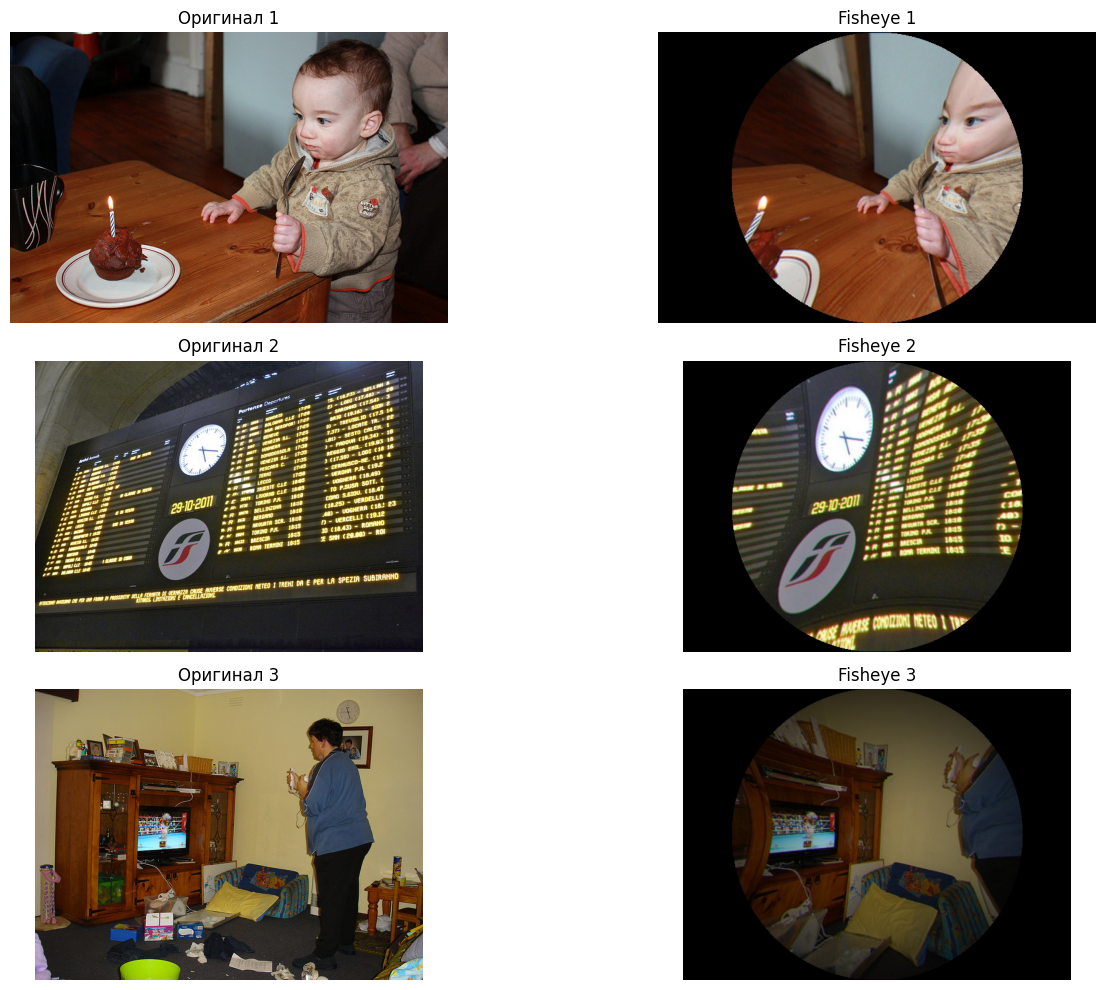

In [10]:
import os
import cv2
import numpy as np
import albumentations as A
from tqdm import tqdm
import yaml
import math
from scipy.stats import truncnorm

# Пути к исходным изображениям и labels
images_dir = '/content/coco2017_yolo/train'
labels_dir = '/content/coco2017_yolo/train'

# Путь к новым данным
fisheye_images_dir = '/content/coco2017_yolo_fisheye/train'
fisheye_labels_dir = '/content/coco2017_yolo_fisheye/train'

os.makedirs(fisheye_images_dir, exist_ok=True)
os.makedirs(fisheye_labels_dir, exist_ok=True)

# Функция для создания более реалистичного эффекта fisheye
def apply_fisheye(image, strength=2.0, ellipticity=1.0, add_vignette=False, add_chromatic_aberration=False):
    """
    Создает реалистичный эффект fisheye с дополнительными эффектами
    Args:
        image: исходное изображение
        strength: сила искажения (1.0 - умеренное, 2.0 - сильное)
        ellipticity: эллиптичность искажения (1.0 - круговое, >1 - эллиптическое)
        add_vignette: добавлять ли виньетирование
        add_chromatic_aberration: добавлять ли хроматические аберрации
    Returns:
        искаженное изображение
    """
    height, width = image.shape[:2]
    x, y = np.meshgrid(np.arange(width), np.arange(height))

    # Нормализация координат
    x = (x - width/2) / (width/2)
    y = (y - height/2) / (height/2)

    # Применяем эллиптичность
    r = np.sqrt((x**2) + ((y*ellipticity)**2))
    theta = np.arctan2(y*ellipticity, x)

    # Искажение типа "рыбий глаз"
    r_new = np.arctan(r * strength) / (np.pi/2)

    # Преобразование обратно в декартовы координаты
    x_new = r_new * np.cos(theta) * width/2 + width/2
    y_new = r_new * np.sin(theta) / ellipticity * height/2 + height/2

    # Ограничение координат
    x_new = np.clip(x_new, 0, width-1).astype(np.float32)
    y_new = np.clip(y_new, 0, height-1).astype(np.float32)

    # Применяем искажение
    distorted = cv2.remap(image, x_new, y_new, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=0)

    if add_vignette:
        # Виньетирование
        rows, cols = distorted.shape[:2]  # Определяем размеры изображения
        kernel_x = cv2.getGaussianKernel(cols, cols/3)
        kernel_y = cv2.getGaussianKernel(rows, rows/3)
        kernel = kernel_y * kernel_x.T
        mask = 255 * kernel / np.linalg.norm(kernel)
        for c in range(3):
            distorted[:, :, c] = distorted[:, :, c] * mask

    if add_chromatic_aberration:
        # Хроматическая аберрация
        rows, cols = distorted.shape[:2]  # Определяем размеры изображения
        for c in range(3):
            shift = np.random.uniform(-2, 2)  # Случайный сдвиг для каждого канала
            M = np.float32([[1, 0, shift], [0, 1, shift]])
            distorted[:, :, c] = cv2.warpAffine(distorted[:, :, c], M, (cols, rows))

    # Маска для круглого вида
    mask = np.zeros((height, width), dtype=np.uint8)
    cv2.circle(mask, (width//2, height//2), int(min(width, height)/2), 255, -1)

    # Применение маски
    result = distorted.copy()
    for c in range(0, 3):
        result[:, :, c] = cv2.bitwise_and(result[:, :, c], mask)

    return result

# Функция для преобразования координат bbox в искаженное пространство
def transform_bbox_fisheye(bbox, width, height, strength=2.0, ellipticity=1.0):
    """
    Преобразует координаты bbox (формат YOLO) для соответствия искажению fisheye
    """
    x_center, y_center, w, h = bbox
    x1 = (x_center - w/2) * width
    y1 = (y_center - h/2) * height
    x2 = (x_center + w/2) * width
    y2 = (y_center + h/2) * height

    points = [[x1, y1], [x2, y1], [x1, y2], [x2, y2], [(x1+x2)/2, (y1+y2)/2]]
    transformed_points = []

    for x, y in points:
        x_norm = (x - width/2) / (width/2)
        y_norm = (y - height/2) / (height/2)
        r = math.sqrt(x_norm**2 + (y_norm*ellipticity)**2)
        theta = math.atan2(y_norm*ellipticity, x_norm)
        r_new = math.atan(r * strength) / (math.pi/2)
        x_new = r_new * math.cos(theta) * width/2 + width/2
        y_new = r_new * math.sin(theta) / ellipticity * height/2 + height/2
        x_new = min(max(0, x_new), width-1)
        y_new = min(max(0, y_new), height-1)
        transformed_points.append((x_new, y_new))

    xs = [p[0] for p in transformed_points[:4]]
    ys = [p[1] for p in transformed_points[:4]]
    new_center_x = transformed_points[4][0] / width
    new_center_y = transformed_points[4][1] / height
    new_width = (max(xs) - min(xs)) / width
    new_height = (max(ys) - min(ys)) / height

    return [
        min(max(0, new_center_x), 1),
        min(max(0, new_center_y), 1),
        min(max(0.01, new_width), 1),
        min(max(0.01, new_height), 1)
    ]

# Генерация случайной силы искажения с нормальным распределением
def get_random_strength():
    mean = 2.0
    std_dev = 0.5
    lower = 1.5
    upper = 3.0
    return truncnorm.rvs((lower - mean) / std_dev, (upper - mean) / std_dev, loc=mean, scale=std_dev)

# Обработка тренировочных данных
image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_name in tqdm(image_files, desc='Создание реалистичной fisheye-аугментации'):
    img_path = os.path.join(images_dir, img_name)
    label_name = os.path.splitext(img_name)[0] + '.txt'
    lbl_path = os.path.join(labels_dir, label_name)

    if not os.path.exists(img_path):
        continue

    image = cv2.imread(img_path)
    if image is None:
        continue

    height, width = image.shape[:2]
    fisheye_strength = get_random_strength()  # Улучшенная генерация силы искажения
    ellipticity = np.random.uniform(0.9, 1.1)  # Случайная эллиптичность
    add_vignette = np.random.rand() < 0.5     # Вероятность добавления виньетирования
    add_chromatic_aberration = np.random.rand() < 0.5  # Вероятность добавления хроматической аберрации

    fisheye_image = apply_fisheye(
        image,
        strength=fisheye_strength,
        ellipticity=ellipticity,
        add_vignette=add_vignette,
        add_chromatic_aberration=add_chromatic_aberration
    )

    bboxes = []
    class_labels = []
    if os.path.exists(lbl_path):
        with open(lbl_path, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id, x_center, y_center, bbox_width, bbox_height = map(float, parts[:5])
                    bboxes.append([x_center, y_center, bbox_width, bbox_height])
                    class_labels.append(int(class_id))
    else:
        continue

    transformed_bboxes = [
        transform_bbox_fisheye(bbox, width, height, strength=fisheye_strength, ellipticity=ellipticity)
        for bbox in bboxes
    ]

    aug_img_path = os.path.join(fisheye_images_dir, img_name)
    cv2.imwrite(aug_img_path, fisheye_image)

    aug_lbl_path = os.path.join(fisheye_labels_dir, label_name)
    with open(aug_lbl_path, 'w') as f:
        for bbox, cls in zip(transformed_bboxes, class_labels):
            x_center, y_center, bbox_width, bbox_height = bbox
            f.write(f"{cls} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")

# Обработка валидационных данных (аналогично тренировочным, но без случайности)
val_src = '/content/coco2017_yolo/val'
val_fisheye_dst = '/content/coco2017_yolo_fisheye/val'
os.makedirs(val_fisheye_dst, exist_ok=True)

val_image_files = [f for f in os.listdir(val_src) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_name in tqdm(val_image_files, desc='Создание fisheye валидационных данных'):
    img_path = os.path.join(val_src, img_name)
    label_name = os.path.splitext(img_name)[0] + '.txt'
    lbl_path = os.path.join(val_src, label_name)

    if not os.path.exists(img_path):
        continue

    image = cv2.imread(img_path)
    if image is None:
        continue

    height, width = image.shape[:2]
    fisheye_strength = 2.0  # Фиксированная сила искажения
    ellipticity = 1.0       # Без эллиптичности
    add_vignette = False    # Без виньетирования
    add_chromatic_aberration = False  # Без хроматических аберраций

    fisheye_image = apply_fisheye(
        image,
        strength=fisheye_strength,
        ellipticity=ellipticity,
        add_vignette=add_vignette,
        add_chromatic_aberration=add_chromatic_aberration
    )

    bboxes = []
    class_labels = []
    if os.path.exists(lbl_path):
        with open(lbl_path, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id, x_center, y_center, bbox_width, bbox_height = map(float, parts[:5])
                    bboxes.append([x_center, y_center, bbox_width, bbox_height])
                    class_labels.append(int(class_id))
    else:
        continue

    transformed_bboxes = [
        transform_bbox_fisheye(bbox, width, height, strength=fisheye_strength, ellipticity=ellipticity)
        for bbox in bboxes
    ]

    aug_img_path = os.path.join(val_fisheye_dst, img_name)
    cv2.imwrite(aug_img_path, fisheye_image)

    aug_lbl_path = os.path.join(val_fisheye_dst, label_name)
    with open(aug_lbl_path, 'w') as f:
        for bbox, cls in zip(transformed_bboxes, class_labels):
            x_center, y_center, bbox_width, bbox_height = bbox
            f.write(f"{cls} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")

# Копируем и адаптируем YAML файл для новых данных
original_yaml = '/content/coco2017_yolo/data.yml'
new_yaml = '/content/coco2017_yolo_fisheye/data_fisheye.yml'

with open(original_yaml, 'r') as file:
    data_yaml = yaml.safe_load(file)

fisheye_data_yaml = data_yaml.copy()
fisheye_data_yaml['train'] = fisheye_images_dir
fisheye_data_yaml['val'] = val_fisheye_dst
fisheye_data_yaml['path'] = os.path.dirname(fisheye_images_dir)

with open(new_yaml, 'w') as file:
    yaml.dump(fisheye_data_yaml, file, default_flow_style=False)

print(f'Создание реалистичного fisheye датасета завершено!')
print(f'Тренировочные изображения: {fisheye_images_dir}')
print(f'Валидационные изображения: {val_fisheye_dst}')
print(f'YAML файл конфигурации: {new_yaml}')

# Функция для визуализации результатов аугментации
def visualize_augmentation_examples():
    import matplotlib.pyplot as plt
    import random

    sample_images = random.sample(image_files, 3)
    plt.figure(figsize=(15, 10))

    for i, img_name in enumerate(sample_images):
        orig_path = os.path.join(images_dir, img_name)
        orig_img = cv2.imread(orig_path)
        orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

        fish_path = os.path.join(fisheye_images_dir, img_name)
        fish_img = cv2.imread(fish_path)
        fish_img = cv2.cvtColor(fish_img, cv2.COLOR_BGR2RGB)

        plt.subplot(3, 2, i*2+1)
        plt.title(f"Оригинал {i+1}")
        plt.imshow(orig_img)
        plt.axis('off')

        plt.subplot(3, 2, i*2+2)
        plt.title(f"Fisheye {i+1}")
        plt.imshow(fish_img)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Запуск визуализации
visualize_augmentation_examples()

In [11]:
# 1. Test original model on fisheye validation set
from ultralytics import YOLO
import os
import shutil
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the original trained model
original_model = YOLO('/content/original_model.pt')

# Path to fisheye validation data YAML
fisheye_val_yaml = '/content/coco2017_yolo_fisheye/data_fisheye.yml'

# Test on fisheye images
metrics_fisheye = original_model.val(data=fisheye_val_yaml)
print("Metrics on fisheye images with original model:", metrics_fisheye)

# Save the results in a dictionary
results = {
    'model': ['original'],
    'normal_precision': [metrics_normal.results_dict['metrics/precision(B)']],
    'normal_recall': [metrics_normal.results_dict['metrics/recall(B)']],
    'normal_mAP50': [metrics_normal.results_dict['metrics/mAP50(B)']],
    'normal_mAP50-95': [metrics_normal.results_dict['metrics/mAP50-95(B)']],
    'fisheye_precision': [metrics_fisheye.results_dict['metrics/precision(B)']],
    'fisheye_recall': [metrics_fisheye.results_dict['metrics/recall(B)']],
    'fisheye_mAP50': [metrics_fisheye.results_dict['metrics/mAP50(B)']],
    'fisheye_mAP50-95': [metrics_fisheye.results_dict['metrics/mAP50-95(B)']]
}


Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1575.0±413.1 MB/s, size: 77.1 KB)


val: Scanning /content/coco2017_yolo_fisheye/val... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<00:00, 2350.77it/s]

val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 e


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:08<00:00,  6.46it/s]


                   all        842       5940      0.235      0.118     0.0948     0.0246
               bicycle        484       2030      0.312      0.181      0.144     0.0341
                   car         31         63      0.356     0.0476     0.0593     0.0175
            motorcycle         89        353      0.118      0.051     0.0236    0.00419
              airplane         26         34      0.251      0.227      0.193     0.0594
                   bus         24         40      0.512      0.315      0.322       0.11
                 train         38         51      0.297      0.157      0.152     0.0351
                 truck         26         27      0.443      0.481      0.413     0.0579
                  boat         41         69      0.138      0.087      0.052    0.00996
         traffic light         25         98      0.223      0.122     0.0733     0.0145
          fire hydrant         31        124          0          0    0.00193   0.000249
             stop sig

1. metrics/precision(B)
Значение: 0.201
Определение : Precision (точность) показывает, какая доля предсказанных моделью объектов действительно является корректными.

\

Precision= True Positives / (True Positives+False Positives)

\

Интерпретация :
Точность модели составляет около 20.1% , что говорит о том, что только 20.1% предсказанных объектов являются верными.
Это относительно низкая точность, что может указывать на большое количество ложноположительных срабатываний (модель ошибочно предсказывает объекты там, где их нет).
2. metrics/recall(B)
Значение: 0.117
Определение : Recall (полнота) показывает, какую долю реальных объектов модель смогла обнаружить.

.

Recall= True Positives / (True Positives+False Negatives)

\

Интерпретация :
Полнота модели составляет около 11.7% , что означает, что модель обнаружила только 11.7% всех реальных объектов.
Это очень низкий показатель, что говорит о том, что модель "пропускает" большинство объектов на fisheye-изображениях.
3. metrics/mAP50(B)
Значение: 0.088
Определение : mAP50 (mean Average Precision при IoU ≥ 0.5) — это среднее значение точности (Average Precision) для всех классов объектов при пороге пересечения (IoU) равном 0.5.
Интерпретация :
Значение 0.088 (или 8.8%) указывает на то, что модель плохо справляется с задачей детекции объектов на fisheye-изображениях даже при относительно низком пороге IoU.
Это может быть связано с тем, что искажения fisheye значительно усложняют распознавание объектов.
4. metrics/mAP50-95(B)
Значение: 0.022
Определение : mAP50-95 — это среднее значение точности (Average Precision) для всех классов объектов, усреднённое по нескольким порогам IoU (от 0.5 до 0.95 с шагом 0.05).
Интерпретация :
Значение 0.022 (или 2.2%) ещё более критично, чем mAP50, так как оно учитывает более строгие пороги IoU.
Это подтверждает, что модель практически не способна точно локализовать объекты на fisheye-изображениях.
5. fitness
Значение: 0.029
Определение : Fitness — это обобщённая метрика, которая часто используется для оценки общей производительности модели. Она может быть комбинацией различных метрик (например, mAP50, precision, recall и других).
Интерпретация :
Значение 0.029 (или 2.9%) указывает на крайне низкую общую производительность модели на fisheye-датасете.
Это подтверждает, что модель плохо адаптирована к работе с искажёнными изображениями.

In [ ]:
# 2. Create mixed datasets with different proportions
proportions = [10, 20, 30, 40, 50]  # Percentages of fisheye images

for prop in proportions:
    # Create directory for this proportion
    mixed_dir = f'/content/coco2017_yolo_mixed_{prop}'
    mixed_train_dir = f'{mixed_dir}/train'
    mixed_val_dir = f'{mixed_dir}/val'  # Use regular validation

    os.makedirs(mixed_train_dir, exist_ok=True)
    os.makedirs(mixed_val_dir, exist_ok=True)

    # Copy normal validation set
    for file in os.listdir('/content/coco2017_yolo/val'):
        src_file = os.path.join('/content/coco2017_yolo/val', file)
        dst_file = os.path.join(mixed_val_dir, file)
        if os.path.isfile(src_file):
            shutil.copy2(src_file, dst_file)

    # Get lists of normal and fisheye training images
    normal_images = [f for f in os.listdir('/content/coco2017_yolo/train')
                     if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Calculate how many fisheye images to include
    total_images = len(normal_images)
    num_fisheye = int(total_images * prop / 100)
    num_normal = total_images - num_fisheye

    # Randomly select normal images
    selected_normal = random.sample(normal_images, num_normal)

    # Copy selected normal images and their labels
    for img_name in selected_normal:
        # Copy image
        src_img = os.path.join('/content/coco2017_yolo/train', img_name)
        dst_img = os.path.join(mixed_train_dir, img_name)
        shutil.copy2(src_img, dst_img)

        # Copy label if exists
        label_name = os.path.splitext(img_name)[0] + '.txt'
        src_lbl = os.path.join('/content/coco2017_yolo/train', label_name)
        dst_lbl = os.path.join(mixed_train_dir, label_name)
        if os.path.exists(src_lbl):
            shutil.copy2(src_lbl, dst_lbl)

    # Copy fisheye images and their labels (up to num_fisheye)
    fisheye_images = [f for f in os.listdir('/content/coco2017_yolo_fisheye/train')
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    selected_fisheye = fisheye_images[:num_fisheye]  # Take the first num_fisheye images

    for img_name in selected_fisheye:
        # Copy image
        src_img = os.path.join('/content/coco2017_yolo_fisheye/train', img_name)
        dst_img = os.path.join(mixed_train_dir, img_name)
        shutil.copy2(src_img, dst_img)

        # Copy label if exists
        label_name = os.path.splitext(img_name)[0] + '.txt'
        src_lbl = os.path.join('/content/coco2017_yolo_fisheye/train', label_name)
        dst_lbl = os.path.join(mixed_train_dir, label_name)
        if os.path.exists(src_lbl):
            shutil.copy2(src_lbl, dst_lbl)

    # Create YAML file for this mixed dataset
    import yaml

    with open('/content/coco2017_yolo/data.yml', 'r') as file:
        data_yaml = yaml.safe_load(file)

    # Update paths for mixed dataset
    mixed_data_yaml = data_yaml.copy()
    mixed_data_yaml['train'] = mixed_train_dir
    mixed_data_yaml['val'] = mixed_val_dir
    mixed_data_yaml['path'] = mixed_dir

    mixed_yaml_path = f'{mixed_dir}/data_mixed_{prop}.yml'
    with open(mixed_yaml_path, 'w') as file:
        yaml.dump(mixed_data_yaml, file, default_flow_style=False)

    print(f'Created mixed dataset with {prop}% fisheye images at {mixed_dir}')
    print(f'Total training images: {len(os.listdir(mixed_train_dir)) // 2}')  # Divide by 2 because of labels

    # 3. Train new YOLOv8n model on this mixed dataset
    model = YOLO('yolov8n.pt')  # Start with fresh pre-trained model

    # Use same training parameters as before
    model.train(
        data=mixed_yaml_path,
        epochs=70,
        imgsz=640,
        batch=16,
        lr0=0.001,
        augment=True,
        mosaic=1.0,
        mixup=0.5,
        patience=10,
        dropout=0.2
    )

    # Save the model
    model.save(f'/content/mixed_{prop}_model.pt')

    # 4. Evaluate on both normal and fisheye validation sets
    model = YOLO(f'/content/mixed_{prop}_model.pt')

    # Normal validation
    normal_val_yaml = '/content/coco2017_yolo/data.yml'
    metrics_normal = model.val(data=normal_val_yaml)
    print(f"Mixed {prop}% model metrics on normal images:", metrics_normal)

    # Fisheye validation
    metrics_fisheye = model.val(data=fisheye_val_yaml)
    print(f"Mixed {prop}% model metrics on fisheye images:", metrics_fisheye)

    # Add results to our dictionary
    results['model'].append(f'mixed_{prop}%')
    results['normal_precision'].append(metrics_normal.results_dict['metrics/precision(B)'])
    results['normal_recall'].append(metrics_normal.results_dict['metrics/recall(B)'])
    results['normal_mAP50'].append(metrics_normal.results_dict['metrics/mAP50(B)'])
    results['normal_mAP50-95'].append(metrics_normal.results_dict['metrics/mAP50-95(B)'])
    results['fisheye_precision'].append(metrics_fisheye.results_dict['metrics/precision(B)'])
    results['fisheye_recall'].append(metrics_fisheye.results_dict['metrics/recall(B)'])
    results['fisheye_mAP50'].append(metrics_fisheye.results_dict['metrics/mAP50(B)'])
    results['fisheye_mAP50-95'].append(metrics_fisheye.results_dict['metrics/mAP50-95(B)'])

# 5. Analyze and visualize results
results_df = pd.DataFrame(results)
print(results_df)

# Save results to CSV
results_df.to_csv('/content/fisheye_experiment_results.csv', index=False)

# Create visualization of results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot mAP50 for both normal and fisheye
axs[0, 0].plot(results_df['model'], results_df['normal_mAP50'], 'o-', label='Normal images')
axs[0, 0].plot(results_df['model'], results_df['fisheye_mAP50'], 'o-', label='Fisheye images')
axs[0, 0].set_title('mAP50 Comparison')
axs[0, 0].set_ylabel('mAP50')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].set_xticklabels(results_df['model'], rotation=45, ha='right')

# Plot mAP50-95 for both normal and fisheye
axs[0, 1].plot(results_df['model'], results_df['normal_mAP50-95'], 'o-', label='Normal images')
axs[0, 1].plot(results_df['model'], results_df['fisheye_mAP50-95'], 'o-', label='Fisheye images')
axs[0, 1].set_title('mAP50-95 Comparison')
axs[0, 1].set_ylabel('mAP50-95')
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].set_xticklabels(results_df['model'], rotation=45, ha='right')

# Plot precision for both normal and fisheye
axs[1, 0].plot(results_df['model'], results_df['normal_precision'], 'o-', label='Normal images')
axs[1, 0].plot(results_df['model'], results_df['fisheye_precision'], 'o-', label='Fisheye images')
axs[1, 0].set_title('Precision Comparison')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend()
axs[1, 0].grid(True)
axs[1, 0].set_xticklabels(results_df['model'], rotation=45, ha='right')

# Plot recall for both normal and fisheye
axs[1, 1].plot(results_df['model'], results_df['normal_recall'], 'o-', label='Normal images')
axs[1, 1].plot(results_df['model'], results_df['fisheye_recall'], 'o-', label='Fisheye images')
axs[1, 1].set_title('Recall Comparison')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].legend()
axs[1, 1].grid(True)
axs[1, 1].set_xticklabels(results_df['model'], rotation=45, ha='right')

plt.tight_layout()
plt.savefig('/content/fisheye_experiment_results.png')
plt.show()

# Calculate tradeoff metrics (how much normal performance is sacrificed for fisheye improvement)
results_df['normal_sacrifice'] = results_df['normal_mAP50'].iloc[0] - results_df['normal_mAP50']
results_df['fisheye_improvement'] = results_df['fisheye_mAP50'] - results_df['fisheye_mAP50'].iloc[0]
results_df['tradeoff_ratio'] = results_df['fisheye_improvement'] / results_df['normal_sacrifice'].replace(0, 1e-10)

print("\nTradeoff Analysis:")
print(results_df[['model', 'normal_sacrifice', 'fisheye_improvement', 'tradeoff_ratio']])

# Find optimal proportion
# (Higher ratio means better tradeoff - more fisheye improvement per unit of normal performance loss)
best_model = results_df.iloc[1:]['tradeoff_ratio'].idxmax() + 1  # +1 because we skip the first row (original)
best_proportion = proportions[best_model - 1]  # -1 to adjust index

print(f"\nOptimal proportion of fisheye images: {best_proportion}%")
print(f"This gives the best tradeoff between fisheye improvement and normal performance loss")

# Visualize the tradeoff
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(results_df['model'][1:]))  # Skip original model

plt.bar(index, results_df['fisheye_improvement'][1:], bar_width, label='Fisheye Improvement')
plt.bar(index + bar_width, results_df['normal_sacrifice'][1:], bar_width, label='Normal Performance Loss')

plt.xlabel('Model')
plt.ylabel('Change in mAP50')
plt.title('Tradeoff between Fisheye Improvement and Normal Performance Loss')
plt.xticks(index + bar_width / 2, [f"{p}%" for p in proportions])
plt.legend()
plt.grid(True, axis='y')

plt.tight_layout()
plt.savefig('/content/fisheye_tradeoff_analysis.png')
plt.show()

Created mixed dataset with 10% fisheye images at /content/coco2017_yolo_mixed_10
Total training images: 3625
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/coco2017_yolo_mixed_10/data_mixed_10.yml, epochs=70, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

train: Scanning /content/coco2017_yolo_mixed_10/train... 3625 images, 34 backgrounds, 628 corrupt: 100%|██████████| 3625/3625 [00:01<00:00, 2476.35it/s]

train: WARNING ⚠️ /content/coco2017_yolo_mixed_10/train/000000000139.jpg: ignoring corrupt image/label: Label class 86 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo_mixed_10/train/000000000776.jpg: ignoring corrupt image/label: Label class 88 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo_mixed_10/train/000000003156.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo_mixed_10/train/000000006213.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo_mixed_10/train/000000007574.jpg: ignoring corrupt image/label: Label class 86 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo_mixed_10/train/000000007818.jpg: ignoring corrupt

train: New cache created: /content/coco2017_yolo_mixed_10/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 865.4±918.2 MB/s, size: 184.6 KB)


val: Scanning /content/coco2017_yolo_mixed_10/val... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<00:00, 1082.41it/s]

val: WARNING ⚠️ /content/coco2017_yolo_mixed_10/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_mixed_10/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_mixed_10/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_mixed_10/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_mixed_10/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_mixed_10/val/000000010977.jpg: ignoring corrupt image/label: Label clas

val: New cache created: /content/coco2017_yolo_mixed_10/val.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      3.48G      1.714      4.444      1.631        204        640: 100%|██████████| 188/188 [01:14<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.41it/s]


                   all        842       5940     0.0904      0.111     0.0661     0.0474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      3.49G      1.675      2.858      1.599         34        640: 100%|██████████| 188/188 [01:11<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.25it/s]


                   all        842       5940      0.324      0.237      0.232      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      3.75G      1.652      2.567      1.601        178        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.49it/s]


                   all        842       5940      0.482      0.287      0.316      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      3.77G      1.637       2.37      1.576        128        640: 100%|██████████| 188/188 [01:13<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]


                   all        842       5940       0.52      0.331      0.354      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      3.79G      1.625      2.288       1.57        106        640: 100%|██████████| 188/188 [01:11<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.94it/s]


                   all        842       5940       0.55      0.346      0.374      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      3.81G      1.603      2.235      1.557        116        640: 100%|██████████| 188/188 [01:11<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.90it/s]


                   all        842       5940      0.504      0.375      0.384      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      3.82G      1.602      2.168      1.551         57        640: 100%|██████████| 188/188 [01:11<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.33it/s]


                   all        842       5940      0.537      0.365      0.388      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      3.84G      1.583      2.145      1.539        105        640: 100%|██████████| 188/188 [01:10<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.45it/s]


                   all        842       5940      0.506       0.38      0.399      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      3.86G      1.583      2.125      1.543         70        640: 100%|██████████| 188/188 [01:10<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.34it/s]


                   all        842       5940       0.53      0.381      0.401      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      3.88G      1.576      2.103      1.539         62        640: 100%|██████████| 188/188 [01:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.33it/s]


                   all        842       5940      0.547      0.376      0.402      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      4.17G      1.565      2.076      1.528         98        640: 100%|██████████| 188/188 [01:10<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.30it/s]


                   all        842       5940      0.525      0.383      0.399      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      4.18G      1.561      2.075      1.526         90        640: 100%|██████████| 188/188 [01:10<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.21it/s]


                   all        842       5940      0.548      0.383       0.41      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70       4.2G      1.549      2.032      1.517        101        640: 100%|██████████| 188/188 [01:09<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.30it/s]


                   all        842       5940      0.561      0.381       0.41      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      4.22G       1.54      2.013      1.509        114        640: 100%|██████████| 188/188 [01:11<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all        842       5940      0.538      0.393      0.417      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      4.24G      1.544      1.994      1.506        113        640: 100%|██████████| 188/188 [01:12<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.86it/s]


                   all        842       5940      0.514      0.396       0.41      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      4.26G      1.536      1.992      1.513         84        640: 100%|██████████| 188/188 [01:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.77it/s]


                   all        842       5940       0.53      0.395      0.417      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      4.28G      1.546      1.999      1.513        169        640: 100%|██████████| 188/188 [01:10<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.40it/s]


                   all        842       5940      0.528      0.395      0.413      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      4.29G      1.525      1.968      1.499        111        640: 100%|██████████| 188/188 [01:10<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.45it/s]


                   all        842       5940       0.57      0.392      0.418      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      4.31G      1.521      1.954      1.494        100        640: 100%|██████████| 188/188 [01:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.25it/s]


                   all        842       5940      0.567      0.381      0.421      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      4.33G      1.538       1.99      1.513        160        640: 100%|██████████| 188/188 [01:10<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.34it/s]


                   all        842       5940      0.564      0.388      0.421      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      4.35G      1.519      1.949        1.5         98        640: 100%|██████████| 188/188 [01:10<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.35it/s]


                   all        842       5940      0.523      0.397      0.418      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      4.36G      1.507      1.944       1.49         49        640: 100%|██████████| 188/188 [01:10<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.28it/s]


                   all        842       5940      0.526      0.398      0.417      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      4.38G      1.504      1.914      1.484         86        640: 100%|██████████| 188/188 [01:10<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.33it/s]


                   all        842       5940      0.547      0.386      0.415      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70       4.4G       1.53      1.946      1.501         81        640: 100%|██████████| 188/188 [01:11<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]


                   all        842       5940      0.566      0.376      0.414      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      4.42G      1.522      1.921      1.494         95        640: 100%|██████████| 188/188 [01:11<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.72it/s]


                   all        842       5940      0.527      0.395      0.425       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      4.44G      1.504      1.904      1.481         67        640: 100%|██████████| 188/188 [01:12<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.85it/s]


                   all        842       5940       0.53      0.388      0.422      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      4.46G        1.5      1.884      1.477        140        640: 100%|██████████| 188/188 [01:10<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.84it/s]


                   all        842       5940       0.53      0.392      0.419      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      4.47G      1.505       1.91      1.488        113        640: 100%|██████████| 188/188 [01:12<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.53it/s]


                   all        842       5940      0.524      0.383      0.421      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      4.49G      1.493      1.876      1.473        105        640: 100%|██████████| 188/188 [01:10<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.26it/s]


                   all        842       5940      0.509      0.402      0.419       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      4.51G      1.492      1.868      1.474        101        640: 100%|██████████| 188/188 [01:10<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.28it/s]


                   all        842       5940      0.512      0.402      0.417      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      4.52G      1.505      1.885      1.487         73        640: 100%|██████████| 188/188 [01:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.22it/s]


                   all        842       5940      0.538      0.389      0.423      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      4.54G      1.489       1.87      1.474         54        640: 100%|██████████| 188/188 [01:10<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.38it/s]


                   all        842       5940      0.556      0.387      0.428      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      4.56G      1.479      1.844      1.464        131        640: 100%|██████████| 188/188 [01:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.35it/s]


                   all        842       5940      0.535      0.407      0.426      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      4.58G      1.481       1.84      1.466         79        640: 100%|██████████| 188/188 [01:10<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.31it/s]


                   all        842       5940      0.545      0.402      0.428      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      4.59G      1.503      1.872      1.473         70        640: 100%|██████████| 188/188 [01:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.75it/s]


                   all        842       5940      0.535       0.41      0.429      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      4.61G      1.462      1.823      1.458         76        640: 100%|██████████| 188/188 [01:11<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.59it/s]


                   all        842       5940      0.523      0.404      0.424      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      4.63G      1.468      1.845      1.466         54        640: 100%|██████████| 188/188 [01:11<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.83it/s]


                   all        842       5940      0.562      0.393      0.424      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      4.65G      1.482      1.848      1.471        149        640: 100%|██████████| 188/188 [01:11<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.74it/s]


                   all        842       5940      0.547      0.382      0.421       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      4.67G      1.473      1.821      1.458         79        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.49it/s]


                   all        842       5940      0.529      0.394      0.422      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      4.68G      1.474      1.802      1.453         77        640: 100%|██████████| 188/188 [01:10<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.42it/s]


                   all        842       5940      0.551      0.394      0.429      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      4.71G      1.465       1.82      1.464         73        640: 100%|██████████| 188/188 [01:10<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.38it/s]


                   all        842       5940      0.587      0.375      0.428      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      4.72G      1.458      1.796      1.449        132        640: 100%|██████████| 188/188 [01:10<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.32it/s]


                   all        842       5940      0.557      0.382      0.426      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      4.74G      1.478      1.821      1.465        112        640: 100%|██████████| 188/188 [01:10<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.25it/s]


                   all        842       5940      0.553      0.393      0.428      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      4.75G      1.461      1.773      1.444        100        640: 100%|██████████| 188/188 [01:10<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.22it/s]


                   all        842       5940      0.503      0.406      0.422      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      4.78G      1.451      1.776      1.447        116        640: 100%|██████████| 188/188 [01:11<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.35it/s]


                   all        842       5940      0.505      0.413      0.432      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      4.79G       1.45      1.785      1.445         90        640: 100%|██████████| 188/188 [01:12<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.82it/s]


                   all        842       5940      0.507      0.416      0.427      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      4.81G      1.464      1.802      1.453        100        640: 100%|██████████| 188/188 [01:11<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.84it/s]


                   all        842       5940      0.482      0.428      0.426      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      4.83G      1.462      1.795      1.448         44        640: 100%|██████████| 188/188 [01:11<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.72it/s]


                   all        842       5940      0.529      0.413      0.427      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      4.85G      1.458      1.791      1.446        126        640: 100%|██████████| 188/188 [01:11<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.49it/s]


                   all        842       5940      0.552      0.394       0.43      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      4.86G      1.458      1.793      1.448        106        640: 100%|██████████| 188/188 [01:11<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.29it/s]


                   all        842       5940      0.571      0.389       0.43      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      4.88G      1.454      1.775      1.443        176        640: 100%|██████████| 188/188 [01:10<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.29it/s]


                   all        842       5940      0.534      0.401      0.426      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70       4.9G      1.451      1.759      1.443        128        640: 100%|██████████| 188/188 [01:09<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.30it/s]


                   all        842       5940      0.525      0.413      0.429      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      4.92G       1.44      1.765       1.44         49        640: 100%|██████████| 188/188 [01:10<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.31it/s]


                   all        842       5940       0.56      0.401       0.43      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      4.93G      1.453      1.781       1.45        109        640: 100%|██████████| 188/188 [01:10<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.36it/s]


                   all        842       5940      0.533      0.409      0.428      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      4.96G      1.438      1.752      1.438        132        640: 100%|██████████| 188/188 [01:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.34it/s]


                   all        842       5940      0.533      0.414       0.43      0.295
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 45, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

55 epochs completed in 1.213 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:12<00:00,  2.24it/s]


                   all        842       5940      0.539      0.424      0.446      0.315
               bicycle        484       2030      0.664      0.629      0.682      0.459
                   car         31         63      0.607      0.238      0.301      0.148
            motorcycle         89        353      0.645      0.416      0.487      0.299
              airplane         26         34      0.507      0.636      0.653      0.407
                   bus         24         40      0.695      0.683        0.7      0.525
                 train         38         51      0.715      0.588      0.662      0.589
                 truck         26         27      0.746      0.778       0.81      0.669
                  boat         41         69      0.344      0.406      0.392      0.228
         traffic light         25         98      0.472      0.296      0.308      0.165
          fire hydrant         31        124      0.542      0.298      0.325      0.183
             stop sig

val: Scanning /content/coco2017_yolo/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/coco2017_yolo/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class la


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:10<00:00,  5.13it/s]


                   all        842       5940      0.518      0.408      0.432      0.296
               bicycle        484       2030      0.656       0.65      0.694      0.457
                   car         31         63      0.517      0.222      0.297      0.134
            motorcycle         89        353      0.618      0.453      0.499      0.291
              airplane         26         34      0.602      0.647      0.689      0.408
                   bus         24         40      0.629      0.625      0.686       0.48
                 train         38         51      0.767      0.608      0.679      0.596
                 truck         26         27      0.661      0.778      0.815      0.637
                  boat         41         69      0.308      0.377      0.347      0.197
         traffic light         25         98      0.406      0.296      0.311      0.153
          fire hydrant         31        124       0.56       0.29      0.319      0.171
             stop sig

val: Scanning /content/coco2017_yolo_fisheye/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 e


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:09<00:00,  5.87it/s]


                   all        842       5940      0.314       0.13      0.127     0.0397
               bicycle        484       2030      0.478      0.221      0.193      0.054
                   car         31         63       0.66     0.0311     0.0691     0.0177
            motorcycle         89        353      0.195      0.034     0.0264    0.00438
              airplane         26         34      0.399      0.324      0.309     0.0907
                   bus         24         40       0.54      0.294      0.239      0.088
                 train         38         51      0.621      0.294       0.34      0.115
                 truck         26         27      0.811      0.637       0.71      0.197
                  boat         41         69      0.288     0.0725     0.0584     0.0166
         traffic light         25         98      0.239     0.0612     0.0495     0.0111
          fire hydrant         31        124      0.075    0.00806    0.00111   0.000367
             stop sig

train: Scanning /content/coco2017_yolo_mixed_20/train... 3353 images, 32 backgrounds, 571 corrupt: 100%|██████████| 3353/3353 [00:05<00:00, 608.23it/s]

train: WARNING ⚠️ /content/coco2017_yolo_mixed_20/train/000000000776.jpg: ignoring corrupt image/label: Label class 88 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo_mixed_20/train/000000003156.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo_mixed_20/train/000000006213.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo_mixed_20/train/000000007574.jpg: ignoring corrupt image/label: Label class 86 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo_mixed_20/train/000000007818.jpg: ignoring corrupt image/label: Label class 86 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo_mixed_20/train/000000007888.jpg: ignoring corrupt

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 48.1±29.3 MB/s, size: 199.6 KB)


val: Scanning /content/coco2017_yolo_mixed_20/val... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:02<00:00, 332.50it/s]

val: WARNING ⚠️ /content/coco2017_yolo_mixed_20/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_mixed_20/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_mixed_20/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_mixed_20/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_mixed_20/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_mixed_20/val/000000010977.jpg: ignoring corrupt image/label: Label clas

val: New cache created: /content/coco2017_yolo_mixed_20/val.cache
Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      3.72G      1.833      4.538      1.716        286        640: 100%|██████████| 174/174 [01:11<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.24it/s]


                   all        842       5940      0.104      0.104     0.0649     0.0472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      4.38G      1.769      2.986      1.672        202        640: 100%|██████████| 174/174 [01:08<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.11it/s]


                   all        842       5940      0.393      0.221      0.218      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      4.38G      1.756       2.65      1.657        373        640: 100%|██████████| 174/174 [01:07<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.42it/s]


                   all        842       5940      0.457      0.289      0.295      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      4.38G      1.748      2.486      1.644        198        640: 100%|██████████| 174/174 [01:08<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.79it/s]


                   all        842       5940      0.534      0.331       0.34      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      4.38G       1.73      2.424      1.637        301        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.12it/s]


                   all        842       5940      0.525      0.362      0.365      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      4.38G      1.742      2.349      1.634        186        640: 100%|██████████| 174/174 [01:07<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.23it/s]


                   all        842       5940      0.551      0.351      0.374       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      4.38G      1.705      2.308      1.623        222        640: 100%|██████████| 174/174 [01:08<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all        842       5940      0.546       0.36      0.382      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      4.38G      1.701      2.286      1.617        281        640: 100%|██████████| 174/174 [01:08<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.87it/s]


                   all        842       5940      0.491      0.379      0.378      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      4.38G      1.695      2.234      1.602        359        640: 100%|██████████| 174/174 [01:07<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.24it/s]


                   all        842       5940      0.544      0.374      0.391      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      4.38G      1.675      2.201      1.591        293        640: 100%|██████████| 174/174 [01:07<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.34it/s]


                   all        842       5940      0.542       0.37      0.397      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      4.38G      1.671       2.19      1.597        161        640: 100%|██████████| 174/174 [01:07<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.80it/s]


                   all        842       5940      0.515      0.395        0.4      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      4.38G       1.64      2.145      1.579        304        640: 100%|██████████| 174/174 [01:06<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.23it/s]


                   all        842       5940      0.537      0.382      0.397      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      4.38G      1.652      2.144      1.585        168        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.16it/s]


                   all        842       5940      0.507      0.383      0.399      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      4.38G      1.636      2.098       1.56        289        640: 100%|██████████| 174/174 [01:07<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.72it/s]


                   all        842       5940      0.535      0.387      0.399      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      4.38G      1.653      2.121      1.578        210        640: 100%|██████████| 174/174 [01:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.36it/s]


                   all        842       5940      0.563      0.366      0.402      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      4.38G      1.625      2.089      1.565        370        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.26it/s]


                   all        842       5940      0.498      0.387      0.401      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      4.38G      1.623       2.09      1.571        237        640: 100%|██████████| 174/174 [01:07<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.07it/s]


                   all        842       5940      0.497      0.385      0.401      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      4.38G      1.626      2.089      1.565        253        640: 100%|██████████| 174/174 [01:07<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.72it/s]


                   all        842       5940      0.512      0.389      0.405      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      4.38G      1.627      2.077      1.565        199        640: 100%|██████████| 174/174 [01:07<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.30it/s]


                   all        842       5940      0.507      0.397      0.403      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      4.38G       1.62      2.033      1.555        277        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.19it/s]


                   all        842       5940      0.554      0.381      0.412      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      4.38G      1.619      2.033      1.559        236        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.56it/s]


                   all        842       5940      0.548      0.384      0.408       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      4.38G      1.614      2.045      1.562        235        640: 100%|██████████| 174/174 [01:07<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]


                   all        842       5940      0.515      0.384      0.408      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      4.38G      1.639      2.052      1.564        303        640: 100%|██████████| 174/174 [01:07<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.02it/s]


                   all        842       5940      0.485      0.396      0.406      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      4.38G      1.598       2.03      1.543        180        640: 100%|██████████| 174/174 [01:07<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.24it/s]


                   all        842       5940       0.53      0.377      0.408      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      4.38G      1.592      1.977      1.537        304        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]


                   all        842       5940      0.507      0.386       0.41       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      4.38G      1.607      2.015      1.548        310        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.23it/s]


                   all        842       5940      0.549      0.377      0.412      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      4.38G      1.581      1.987      1.537        315        640: 100%|██████████| 174/174 [01:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.30it/s]


                   all        842       5940      0.528      0.393      0.416      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      4.38G      1.593      1.981      1.535        237        640: 100%|██████████| 174/174 [01:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.48it/s]


                   all        842       5940      0.511      0.402       0.42      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      4.38G      1.569       1.96      1.525        300        640: 100%|██████████| 174/174 [01:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.55it/s]


                   all        842       5940      0.509      0.395      0.411      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      4.38G      1.559      1.934      1.515        209        640: 100%|██████████| 174/174 [01:06<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.17it/s]


                   all        842       5940      0.484       0.41      0.411      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      4.38G       1.59      1.964      1.532        342        640: 100%|██████████| 174/174 [01:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.30it/s]


                   all        842       5940      0.505      0.398      0.413      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      4.38G      1.577      1.944      1.526        268        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.53it/s]


                   all        842       5940      0.527      0.399      0.419      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      4.38G      1.556      1.946      1.515        299        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.34it/s]


                   all        842       5940      0.549      0.384      0.412      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      4.38G       1.56      1.932      1.519        208        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.30it/s]


                   all        842       5940      0.567      0.384      0.417      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      4.38G      1.573      1.948      1.528        284        640: 100%|██████████| 174/174 [01:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.68it/s]


                   all        842       5940      0.526      0.399      0.422      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      4.38G      1.541      1.912      1.508        241        640: 100%|██████████| 174/174 [01:06<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.48it/s]


                   all        842       5940      0.545      0.391      0.421      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      4.38G      1.577      1.959      1.535        211        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.21it/s]


                   all        842       5940      0.502       0.41      0.417      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      4.38G      1.579       1.94      1.525        319        640: 100%|██████████| 174/174 [01:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.40it/s]


                   all        842       5940      0.538      0.399      0.423      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      4.38G      1.568      1.923       1.52        291        640: 100%|██████████| 174/174 [01:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all        842       5940      0.521        0.4      0.417      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      4.39G       1.55      1.912      1.505        150        640: 100%|██████████| 174/174 [01:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.29it/s]


                   all        842       5940      0.506      0.413      0.417      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      4.41G      1.568      1.914      1.518        179        640: 100%|██████████| 174/174 [01:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.19it/s]


                   all        842       5940      0.552      0.389      0.415      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      4.43G      1.567      1.909      1.514        214        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]


                   all        842       5940      0.516      0.398      0.414      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      4.44G      1.552      1.874      1.503        243        640: 100%|██████████| 174/174 [01:06<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.26it/s]


                   all        842       5940      0.543      0.389      0.418      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      4.46G      1.546      1.872      1.505        236        640: 100%|██████████| 174/174 [01:07<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.32it/s]


                   all        842       5940      0.539      0.392      0.421      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      4.48G      1.558      1.899      1.517        319        640: 100%|██████████| 174/174 [01:07<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all        842       5940      0.547      0.393      0.422      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70       4.5G      1.539      1.877        1.5        352        640: 100%|██████████| 174/174 [01:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.29it/s]


                   all        842       5940      0.539      0.398      0.421      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      4.51G      1.536      1.882      1.501        221        640: 100%|██████████| 174/174 [01:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.13it/s]


                   all        842       5940      0.515      0.417      0.423      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      4.53G      1.528      1.856        1.5        342        640: 100%|██████████| 174/174 [01:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.72it/s]


                   all        842       5940      0.536      0.391      0.426       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      4.55G      1.541      1.875      1.503        245        640: 100%|██████████| 174/174 [01:05<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.21it/s]


                   all        842       5940      0.486      0.425       0.42      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      4.57G      1.533      1.863      1.498        201        640: 100%|██████████| 174/174 [01:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.26it/s]


                   all        842       5940      0.501      0.415      0.422      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      4.59G      1.534      1.871      1.501        302        640: 100%|██████████| 174/174 [01:07<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all        842       5940      0.573      0.391      0.429      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70       4.6G      1.523      1.845      1.485        239        640: 100%|██████████| 174/174 [01:06<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.39it/s]


                   all        842       5940      0.552      0.396      0.428      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      4.62G      1.543      1.864      1.504        253        640: 100%|██████████| 174/174 [01:07<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.30it/s]


                   all        842       5940      0.565      0.394      0.428      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      4.64G      1.535      1.871      1.499        299        640: 100%|██████████| 174/174 [01:07<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.42it/s]


                   all        842       5940      0.538      0.401      0.431      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      4.66G       1.52      1.827      1.484        255        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.76it/s]


                   all        842       5940      0.533      0.405      0.427      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      4.68G      1.517      1.814      1.481        233        640: 100%|██████████| 174/174 [01:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.21it/s]


                   all        842       5940      0.528      0.406      0.428      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70       4.7G      1.548      1.874      1.506        266        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.45it/s]


                   all        842       5940      0.514      0.424      0.428      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      4.71G       1.52      1.819      1.489        285        640: 100%|██████████| 174/174 [01:07<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.84it/s]


                   all        842       5940      0.521      0.415      0.429      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      4.73G      1.519      1.831      1.488        360        640: 100%|██████████| 174/174 [01:07<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.25it/s]


                   all        842       5940      0.521      0.413      0.432      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      4.75G      1.524      1.815       1.48        261        640: 100%|██████████| 174/174 [01:07<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.28it/s]


                   all        842       5940      0.526      0.415       0.43      0.292
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      4.76G      1.359      1.621      1.368        147        640: 100%|██████████| 174/174 [00:52<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.58it/s]


                   all        842       5940      0.498      0.392      0.401      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      4.78G      1.305      1.439      1.339         87        640: 100%|██████████| 174/174 [00:49<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.40it/s]


                   all        842       5940       0.51      0.401       0.41      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70       4.8G      1.298      1.384      1.326         97        640: 100%|██████████| 174/174 [00:48<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.22it/s]


                   all        842       5940      0.531      0.404      0.414      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      4.82G      1.294      1.367      1.325         80        640: 100%|██████████| 174/174 [00:49<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]


                   all        842       5940      0.543      0.397      0.421      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      4.83G      1.281      1.349      1.316        145        640: 100%|██████████| 174/174 [00:49<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.36it/s]


                   all        842       5940      0.536        0.4       0.42      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      4.85G       1.29       1.34      1.321        101        640: 100%|██████████| 174/174 [00:49<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.71it/s]


                   all        842       5940      0.549      0.399      0.423      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      4.87G      1.272      1.323      1.311        138        640: 100%|██████████| 174/174 [00:49<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.92it/s]


                   all        842       5940      0.551      0.399      0.422      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      4.89G       1.27      1.322      1.311         77        640: 100%|██████████| 174/174 [00:49<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.34it/s]


                   all        842       5940      0.558      0.402      0.427       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      4.91G      1.267      1.316      1.306        101        640: 100%|██████████| 174/174 [00:49<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.48it/s]


                   all        842       5940      0.534       0.41      0.425      0.289
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 59, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

69 epochs completed in 1.406 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]


                   all        842       5940      0.539      0.425      0.448      0.315
               bicycle        484       2030      0.648      0.624      0.668      0.451
                   car         31         63      0.472       0.27      0.306      0.142
            motorcycle         89        353      0.578      0.419      0.469      0.286
              airplane         26         34      0.598      0.656      0.676      0.434
                   bus         24         40      0.729        0.7      0.701      0.539
                 train         38         51      0.709      0.627      0.678      0.586
                 truck         26         27      0.717      0.815      0.841      0.658
                  boat         41         69      0.443      0.391       0.39      0.233
         traffic light         25         98      0.456      0.316      0.329      0.164
          fire hydrant         31        124      0.526      0.306      0.333      0.184
             stop sig

val: Scanning /content/coco2017_yolo/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/coco2017_yolo/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class la


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:10<00:00,  5.10it/s]


                   all        842       5940      0.536      0.404      0.432      0.295
               bicycle        484       2030      0.663      0.634      0.681       0.45
                   car         31         63      0.384      0.254      0.269      0.124
            motorcycle         89        353      0.626      0.445        0.5      0.289
              airplane         26         34      0.696      0.606      0.698      0.392
                   bus         24         40      0.732       0.65      0.691      0.491
                 train         38         51      0.725      0.588      0.631      0.554
                 truck         26         27      0.647      0.815      0.766      0.593
                  boat         41         69      0.339      0.304      0.306      0.168
         traffic light         25         98      0.441      0.296      0.333      0.167
          fire hydrant         31        124      0.573      0.303      0.324      0.183
             stop sig

val: Scanning /content/coco2017_yolo_fisheye/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_fisheye/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 e


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:09<00:00,  5.66it/s]


                   all        842       5940      0.269      0.156      0.146      0.049
               bicycle        484       2030      0.401      0.258      0.222     0.0673
                   car         31         63      0.211     0.0317     0.0608     0.0173
            motorcycle         89        353      0.277      0.051     0.0383    0.00714
              airplane         26         34      0.306      0.412      0.374      0.126
                   bus         24         40       0.42        0.3      0.237      0.086
                 train         38         51      0.426      0.373      0.393       0.15
                 truck         26         27      0.575      0.704      0.671      0.239
                  boat         41         69      0.269      0.087     0.0786     0.0284
         traffic light         25         98      0.167     0.0816     0.0499     0.0148
          fire hydrant         31        124          0          0    0.00121   0.000242
             stop sig

train: Scanning /content/coco2017_yolo_mixed_30/train... 3174 images, 29 backgrounds, 541 corrupt: 100%|██████████| 3174/3174 [00:04<00:00, 750.07it/s]

train: WARNING ⚠️ /content/coco2017_yolo_mixed_30/train/000000000139.jpg: ignoring corrupt image/label: Label class 86 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo_mixed_30/train/000000000776.jpg: ignoring corrupt image/label: Label class 88 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo_mixed_30/train/000000003156.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo_mixed_30/train/000000006213.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo_mixed_30/train/000000007574.jpg: ignoring corrupt image/label: Label class 86 exceeds dataset class count 80. Possible class labels are 0-79
train: WARNING ⚠️ /content/coco2017_yolo_mixed_30/train/000000007818.jpg: ignoring corrupt

train: New cache created: /content/coco2017_yolo_mixed_30/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 39.8±14.4 MB/s, size: 199.6 KB)


val: Scanning /content/coco2017_yolo_mixed_30/val... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:03<00:00, 321.05it/s]

val: WARNING ⚠️ /content/coco2017_yolo_mixed_30/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_mixed_30/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_mixed_30/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_mixed_30/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_mixed_30/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: WARNING ⚠️ /content/coco2017_yolo_mixed_30/val/000000010977.jpg: ignoring corrupt image/label: Label clas

Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      4.72G       1.99      4.675      1.847        227        640: 100%|██████████| 165/165 [01:09<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.20it/s]


                   all        842       5940     0.0865      0.093     0.0591     0.0419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      4.72G      1.925      3.161      1.777        150        640: 100%|██████████| 165/165 [01:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.55it/s]


                   all        842       5940       0.36      0.206      0.205      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      4.72G      1.919       2.84      1.764        147        640: 100%|██████████| 165/165 [01:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.05it/s]


                   all        842       5940      0.462      0.273      0.286      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      4.72G      1.896       2.65      1.742        138        640: 100%|██████████| 165/165 [01:05<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.05it/s]


                   all        842       5940      0.561      0.306       0.33       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      4.72G      1.887      2.559      1.738        159        640: 100%|██████████| 165/165 [01:05<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.45it/s]


                   all        842       5940      0.523      0.338      0.355      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      4.72G      1.843      2.468      1.702        198        640: 100%|██████████| 165/165 [01:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.13it/s]


                   all        842       5940      0.568      0.335      0.363      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      4.72G      1.839      2.429      1.707        151        640: 100%|██████████| 165/165 [01:05<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.12it/s]


                   all        842       5940      0.517      0.351      0.368      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      4.72G      1.822       2.39       1.69        217        640: 100%|██████████| 165/165 [01:06<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.42it/s]


                   all        842       5940      0.499      0.358      0.374      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      4.72G      1.834      2.406      1.715        157        640: 100%|██████████| 165/165 [01:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.03it/s]


                   all        842       5940      0.495      0.375      0.382      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      4.72G      1.789      2.316      1.666        140        640: 100%|██████████| 165/165 [01:05<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.03it/s]


                   all        842       5940      0.491      0.382      0.389      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      4.72G      1.793      2.323      1.676         98        640: 100%|██████████| 165/165 [01:05<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.55it/s]


                   all        842       5940      0.515      0.358      0.388      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      4.94G      1.797      2.295      1.676         98        640: 100%|██████████| 165/165 [01:05<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.03it/s]


                   all        842       5940      0.511      0.383      0.395       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      4.94G       1.79      2.293      1.674        126        640: 100%|██████████| 165/165 [01:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.12it/s]


                   all        842       5940      0.532      0.369       0.39      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      4.94G      1.772      2.275      1.664        141        640: 100%|██████████| 165/165 [01:04<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.14it/s]


                   all        842       5940      0.544      0.377      0.398      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      4.94G      1.767       2.23      1.646        216        640: 100%|██████████| 165/165 [01:05<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.03it/s]


                   all        842       5940      0.493      0.393      0.392      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      4.94G       1.77      2.249      1.655        324        640:  82%|████████▏ | 135/165 [00:54<00:10,  2.77it/s]